In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

✅ Archivo cargado correctamente.
ℹ️ Análisis realizado sobre 121 participantes únicos.

--- Distribución: Genero ---
Mujer         66.12%
Hombre         31.4%
No binario     1.65%
Otro           0.83%
Name: Genero, dtype: object




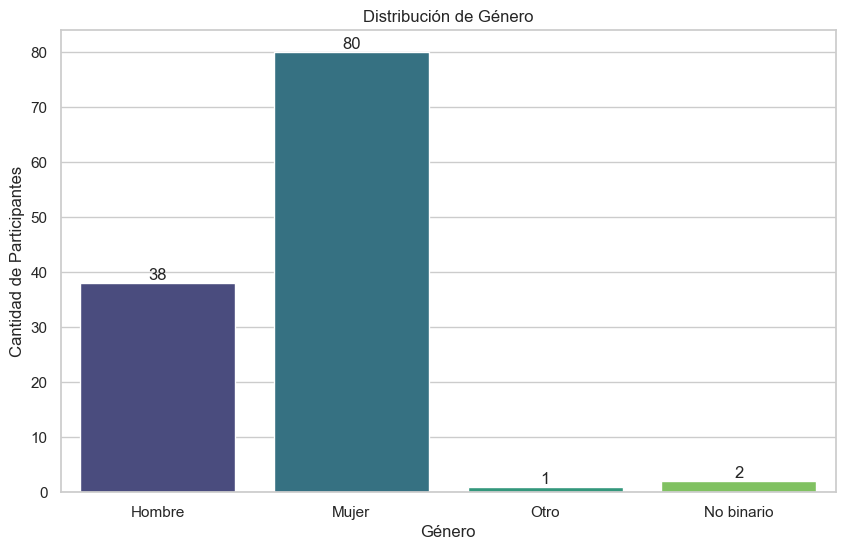

--- Estadísticas descriptivas: politica ---
count    121.0
mean       3.7
std        1.4
min        1.0
25%        3.0
50%        4.0
75%        5.0
max        7.0
Name: politica, dtype: float64
------------------------------


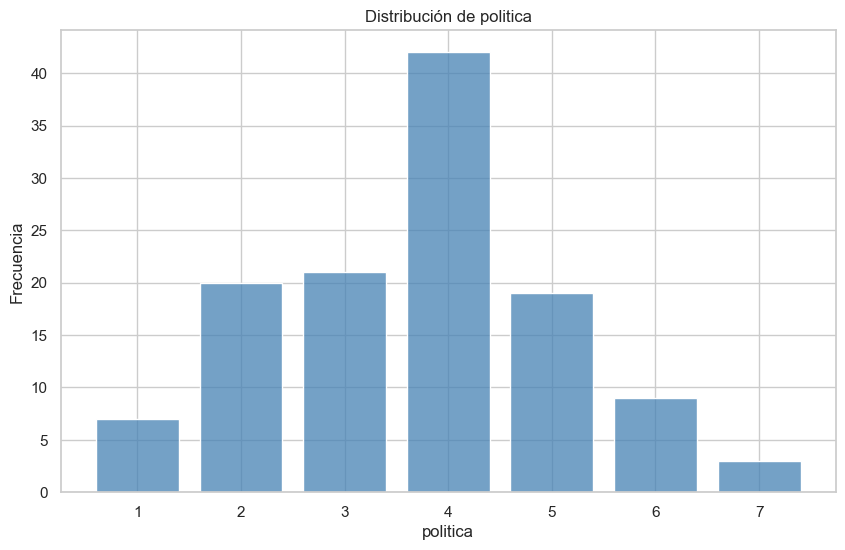

--- Estadísticas descriptivas: nivel_se ---
count    121.00
mean       5.56
std        1.50
min        2.00
25%        5.00
50%        6.00
75%        7.00
max       10.00
Name: nivel_se, dtype: float64
------------------------------


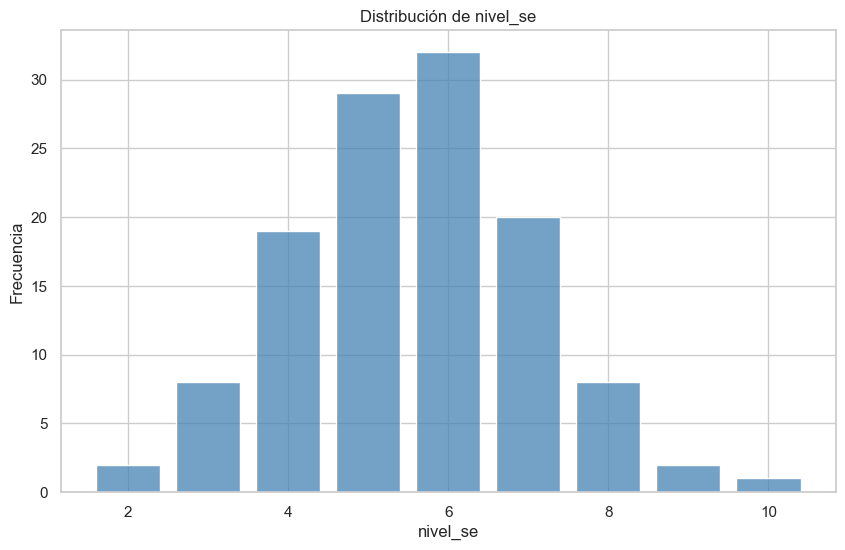

--- Estadísticas descriptivas: SDO_Score ---
count    121.00
mean       3.01
std        0.50
min        1.40
25%        2.80
50%        3.00
75%        3.30
max        5.00
Name: SDO_Score, dtype: float64
------------------------------


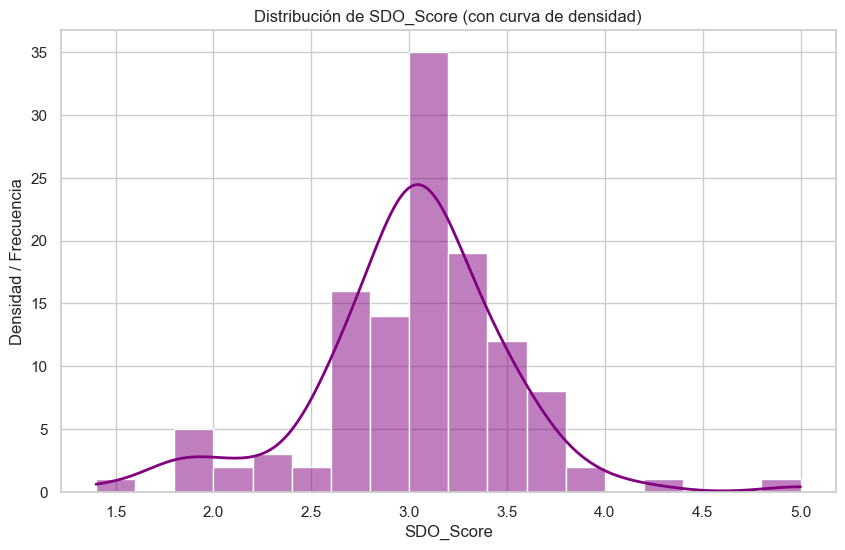

--- Estadísticas descriptivas: NDC_Score ---
count    121.00
mean       3.18
std        0.48
min        2.17
25%        2.83
50%        3.17
75%        3.50
max        5.00
Name: NDC_Score, dtype: float64
------------------------------


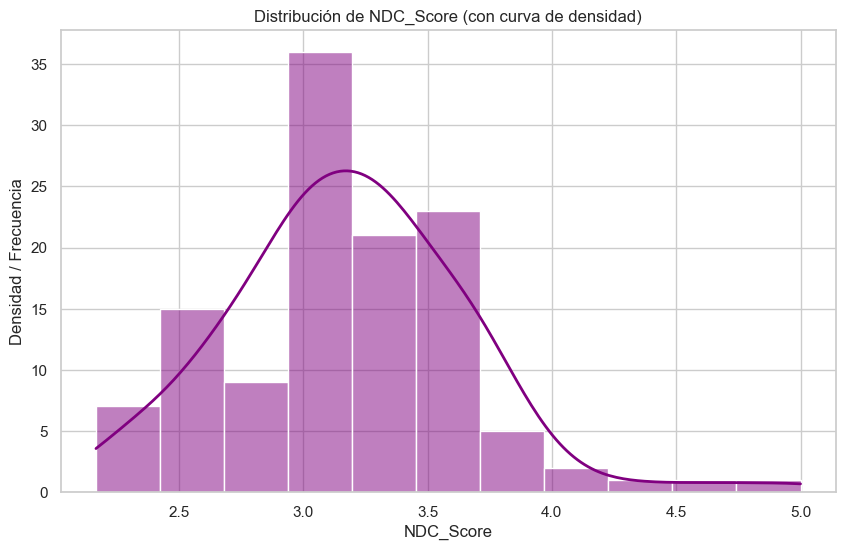

In [7]:
# Configuración estética de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def analizar_muestra(archivo_csv):
    # 1. Cargar el archivo
    try:
        df = pd.read_csv(archivo_csv)
        print("✅ Archivo cargado correctamente.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo: {e}")
        return

    # 2. Transformación LONG -> WIDE
    # Identificamos al sujeto para quedarnos con una sola fila por persona.
    col_id = 'ID_Sujeto' 
    
    if col_id not in df.columns:
        # Búsqueda automática de la columna ID si el nombre no coincide exacto
        posibles_ids = [c for c in df.columns if 'id' in c.lower() or 'suj' in c.lower()]
        if posibles_ids:
            col_id = posibles_ids[0]
            print(f"⚠️ Usando '{col_id}' como identificador de sujetos.")
        else:
            print("❌ No se encontró una columna de ID. Verifica el nombre en tu CSV.")
            return

    # Eliminamos duplicados basándonos en el ID para tener datos únicos por sujeto
    df_sujetos = df.drop_duplicates(subset=col_id).copy()
    print(f"ℹ️ Análisis realizado sobre {len(df_sujetos)} participantes únicos.\n")

    # =================================================================
    # 3. GRÁFICO DE BARRAS: GÉNERO
    # =================================================================
    col_genero = 'Genero' # Verifica que coincida con tu CSV (ej. 'Gender', 'sexo')
    
    if col_genero in df_sujetos.columns:
        print(f"--- Distribución: {col_genero} ---")
        print(df_sujetos[col_genero].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
        print("\n")
        
        plt.figure()
        ax = sns.countplot(x=col_genero, data=df_sujetos, palette='viridis')
        plt.title('Distribución de Género')
        plt.ylabel('Cantidad de Participantes')
        plt.xlabel('Género')
        
        # Etiquetas de valores
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom')
        plt.show()
    else:
        print(f"⚠️ Variable '{col_genero}' no encontrada.")

    # =================================================================
    # 4. HISTOGRAMAS SIMPLES: POLÍTICA Y NIVEL SOCIOECONÓMICO
    # =================================================================
    vars_ordinales = ['politica', 'nivel_se'] # Ajusta nombres si es necesario (ej. 'nivel_se')
    
    for col in vars_ordinales:
        if col in df_sujetos.columns:
            print(f"--- Estadísticas descriptivas: {col} ---")
            print(df_sujetos[col].describe().round(2))
            print("-" * 30)
            
            plt.figure()
            # Bins discretos para escalas ordinales
            sns.histplot(df_sujetos[col].dropna(), discrete=True, shrink=.8, color='steelblue')
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.show()
        else:
            print(f"⚠️ Variable '{col}' no encontrada.")

    # =================================================================
    # 5. HISTOGRAMAS + DENSIDAD (KDE): SCORES PSICOMÉTRICOS
    # =================================================================
    vars_metricas = ['SDO_Score', 'NDC_Score']
    
    for col in vars_metricas:
        if col in df_sujetos.columns:
            print(f"--- Estadísticas descriptivas: {col} ---")
            print(df_sujetos[col].describe().round(2))
            print("-" * 30)
            
            plt.figure()
            # kde=True agrega la curva suave
            sns.histplot(df_sujetos[col].dropna(), kde=True, color='purple', line_kws={'linewidth': 2})
            plt.title(f'Distribución de {col} (con curva de densidad)')
            plt.xlabel(col)
            plt.ylabel('Densidad / Frecuencia')
            plt.show()
        else:
            print(f"⚠️ Variable '{col}' no encontrada.")

# --- EJECUCIÓN ---
# Reemplaza 'tus_datos.csv' por el nombre real de tu archivo
nombre_archivo = '../data/processed/df_long.csv' 
if __name__ == '__main__':
    analizar_muestra(nombre_archivo)